### K-means clustering vs DBSCAN which is better?

| Feature                   | K-means                         | DBSCAN                           |
|----------------------------|----------------------------------|----------------------------------|
| **Type of Clusters**       | Spherical (round shape)          | Any shape (even irregular blobs) |
| **Need to specify**        | Number of clusters `k`           | Distance threshold `eps` and minimum points `minPts` |
| **Handles noise/outliers?** | No (forces every point into a cluster) | Yes (can label points as noise) |
| **Good for**               | Well-separated, equal-size clusters | Clusters of varying shapes and noise |
| **Performance on large datasets** | Fast (scales well)         | Slower (especially for huge data) |
| **Sensitive to scaling?**  | Yes (needs features normalized)  | Yes (also needs normalization)  |

---

### So when is one **better** than the other?

- If your clusters are **globular**, **similar in size**, and **you know roughly how many clusters you expect** → **K-means** is a good, simple choice.
- If your data has **clusters of strange shapes**, **uneven densities**, or you want to **detect noise/outliers** → **DBSCAN** is usually **better**.

---

**Real-world feeling:**
- **K-means** is more popular in industry because it's simple and fast.
- **DBSCAN** is loved in research and messy real-world data (like geospatial, customer behavior, etc.) because it's more flexible.

---

### Case: 1

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


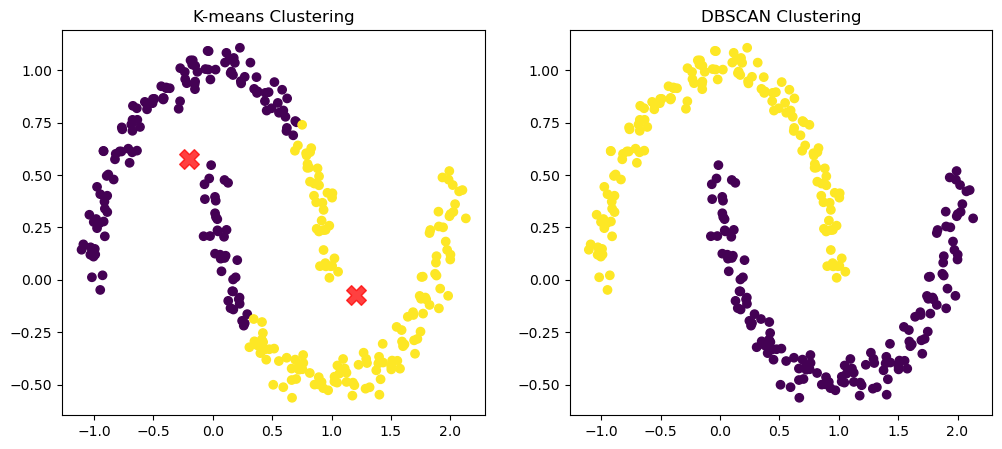

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

# Step 1: Create a "moon-shaped" dataset (non-globular clusters)
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Step 2: Apply K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)


# Step 4: Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# K-means plot
ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax1.set_title('K-means Clustering')

# DBSCAN plot
ax2.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax2.set_title('DBSCAN Clustering')

plt.show()


### Case: 2

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


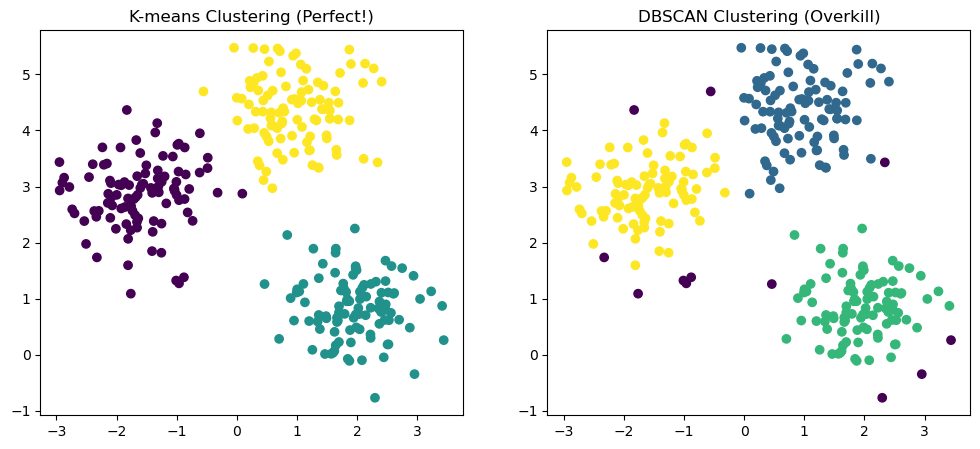

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN

# Step 1: Create simple round blobs
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Step 2: Apply K-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 4: Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# K-means plot
ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering (Perfect!)')

# DBSCAN plot
ax2.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax2.set_title('DBSCAN Clustering (Overkill)')

plt.show()


In [ ]:
# K-means will perfectly find the 3 round blobs.
# DBSCAN might merge two clusters or mark some points as noise, because it’s overthinking the simple structure.

---

#  K-means vs DBSCAN Cheat Sheet (Real-world uses)

| Situation | Better Choice | Why? |
|:----------|:--------------|:-----|
| You know how many clusters you expect (e.g., 3 customer groups) | **K-means** | You set `k`, fast and clean. |
| Clusters are round, equally sized, and clearly separate | **K-means** | Fits K-means assumptions. |
| Data is messy, weird shapes (e.g., rings, spirals, clouds) | **DBSCAN** | Can find non-circular clusters. |
| You care about *finding outliers* (e.g., fraud, unusual behavior) | **DBSCAN** | It labels noise separately! |
| Data size is very large (millions of rows) and speed matters | **K-means** | Much faster than DBSCAN. |
| Clusters have different densities (some tight, some loose) | **DBSCAN** | Adapts to density changes. |
| You don't know the number of clusters in advance | **DBSCAN** | No need to guess `k`! |
| Features are not scaled (raw data) | **Neither** | First, normalize/standardize your data! |

---


# Example Real-World Applications:

| Problem | Method | Why |
|:--------|:-------|:----|
| Customer Segmentation (simple) | K-means | Clear groups based on spending, age, etc. |
| Anomaly Detection (fraud, attacks) | DBSCAN | Finds "odd" points easily as noise. |
| Analyzing GPS points (e.g., delivery routes) | DBSCAN | Roads aren't straight — needs flexible clustering. |
| Image Compression (color clustering) | K-means | Quick clustering of pixel colors. |
| Finding social groups in networks | DBSCAN | Networks are messy! |

---